# Principles of Machine Learning Coursework: Regression Analysis on Red Wine Quality Dataset

## Introduction

In this project, a regression analysis will be performed using the Red Wine Quality dataset. The objective is to predict the quality of red wine based on various features. Five machine learning algorithm models will be developed and trained using the dataset and each models performance will be evaluated.

### The Dataset

The dataset used is the "Red Wine Quality" dataset, which can be found on Kaggle (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009).

### Machine Learning Algorithms

The following algorithms will be applied:
- Linear Regression
- Ridge Regression
- Decision Trees
- Support Vector Regression (SVR)
- Random Forest

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

The dataset titled 'Red Wine Quality' is loaded and the first few rows of the dataset are displayed to ensure it is uploaded correctly.

In [4]:
# Load dataset
data = pd.read_csv('winequality-red.csv')

# Display the first few rows of the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Preprocessing

Data preprocessing is required to clean the data so that it can be used by machine learning algorithm models.

### Exploratory Data Analysis (EDA)
The dataset is explored to understand its structure, relationships, and potential issues such as missing values and outliers. 

The target variable is 'quality', and all other columns are features used for prediction. The feature variables are; fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, density, pH, sulphates and alcohol.

Heatmaps and histograms are used as visualisation tools to examine feature distributions and correlations, providing insight into the relationships between features and the target variable. Additionally, they may also highlight any preprocssing requirements of the data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

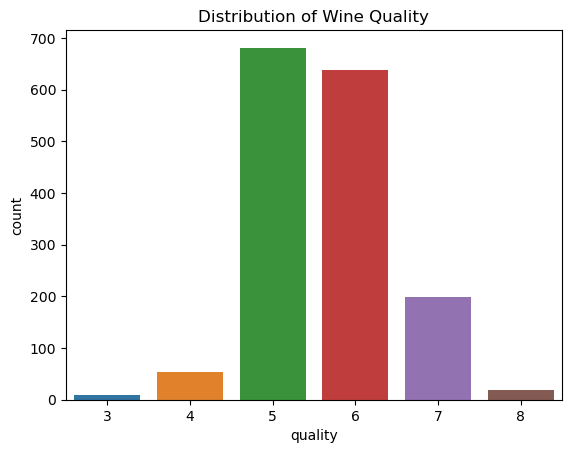

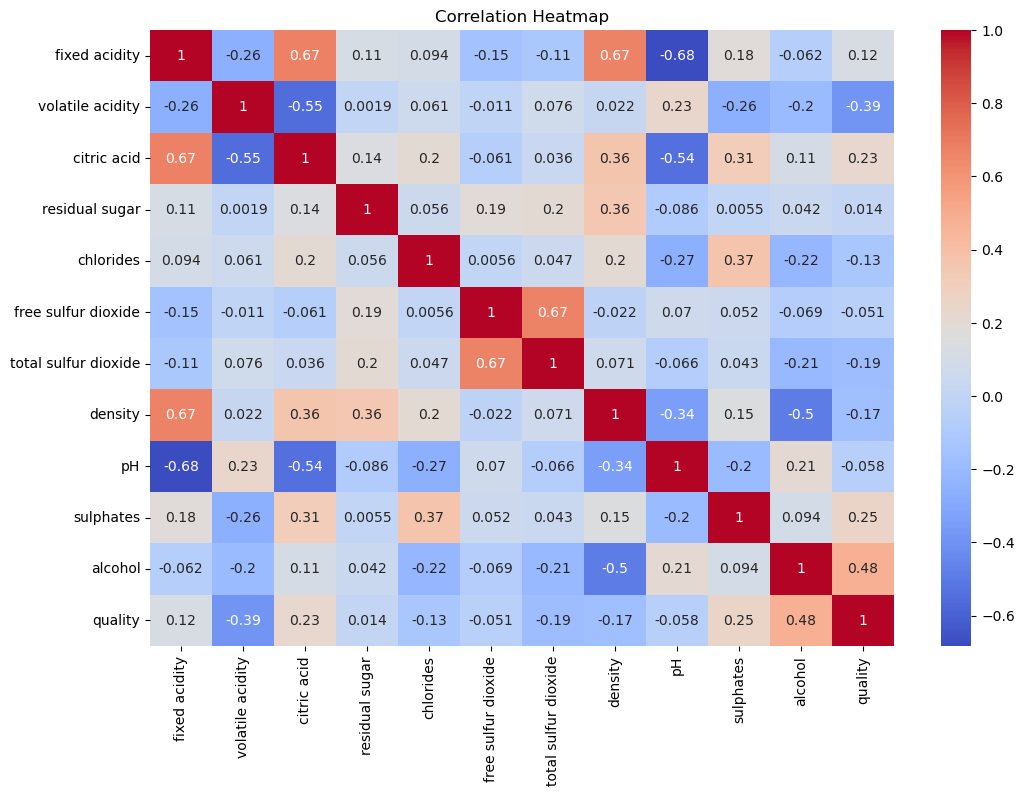

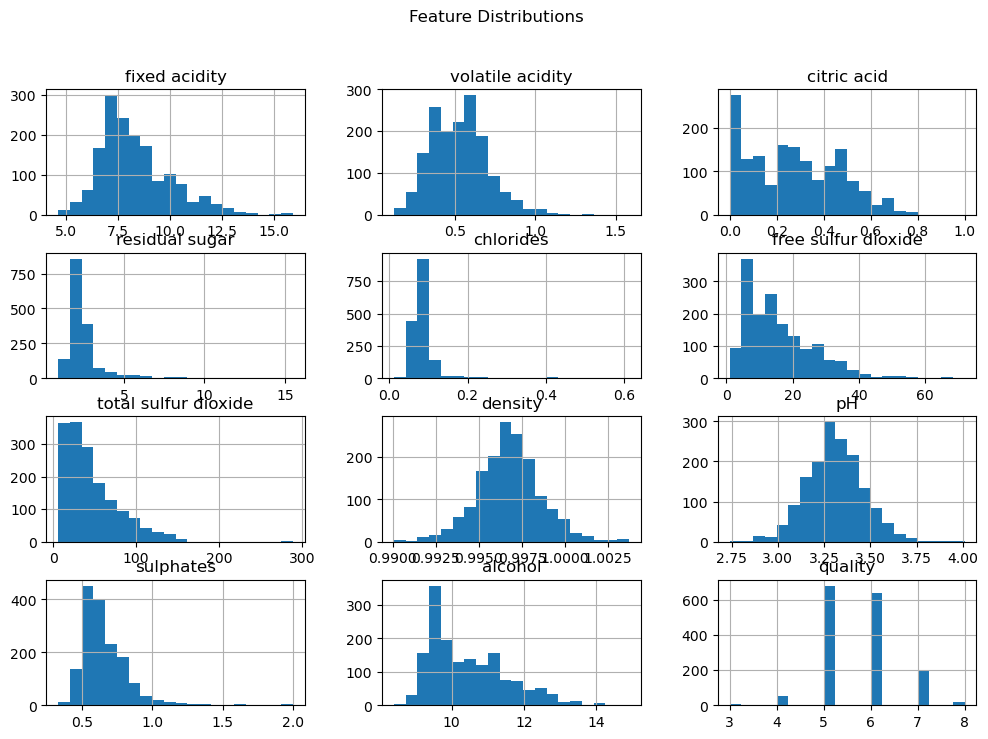

In [6]:
# Overview of the dataset
print(data.info())
print(data.describe())

# Visualise the distribution of the target variable (quality)
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()

# Visualise correlations using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Visualise the distribution of each feature
data.hist(bins=20, figsize=(12, 8))
plt.suptitle('Feature Distributions')
plt.show()

### Handling Missing Values
The check for missing values in the dataset is completed and zero missing values were found.

In [8]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Handling Outliers
Outliers are checked for by visualising the distribution of data using boxplots. They are handled by removing data points that fall outside the range defined by the interquartile range (IQR).

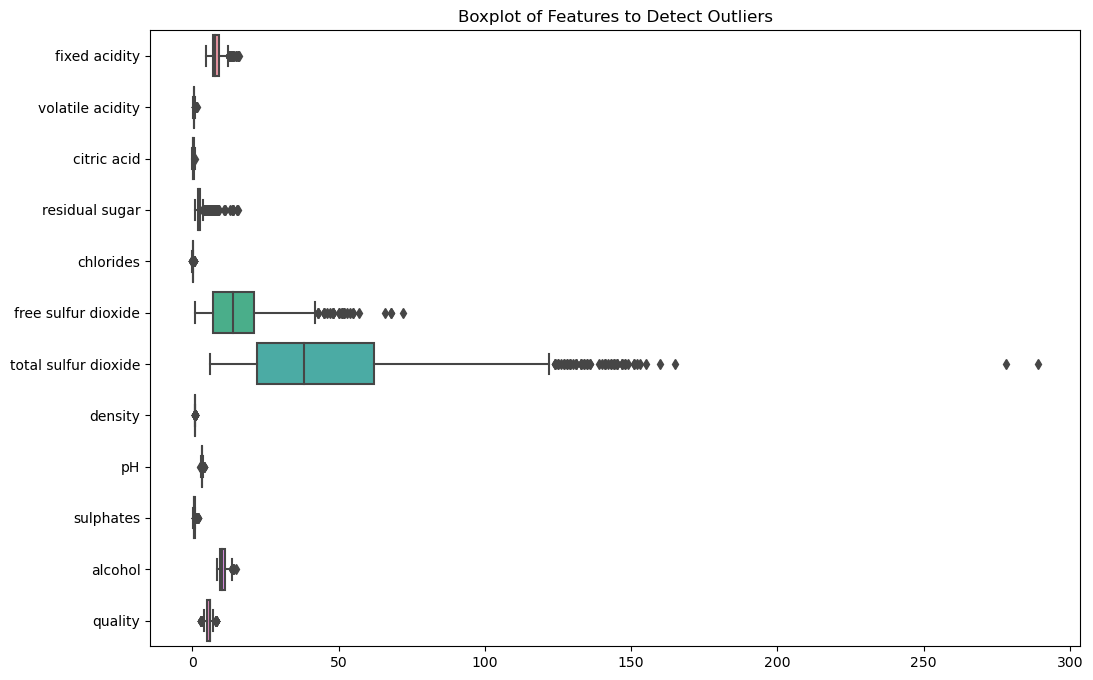

Data after removing outliers: (1179, 12)


In [10]:
# Visualise boxplots to check for outliers in the features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h")
plt.title('Boxplot of Features to Detect Outliers')
plt.show()

# Optionally remove outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Filtering out the outliers
data_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data after removing outliers:", data_cleaned.shape)

### Standardisation of Data

Due to the features varying in scale, standardisation is applied to bring them onto a common scale. This is crucial as algorithms such as; SVR and Ridge Regression can be sensitive to the number of input features.

In [12]:
# Separate the features and the target
X = data_cleaned.drop(columns='quality')
y = data_cleaned['quality']

# Standardising the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   
1      -0.248346          2.174284    -1.375744        0.940570   1.356569   
2      -0.248346          1.443297    -1.152735        0.259965   0.937312   
3       2.084173         -1.480652     1.746386       -0.647508  -0.250582   
4      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.457421             -0.316839  0.763633  1.407839  -0.614084   
1             1.135446              0.947754  0.135771 -0.946440   0.419963   
2            -0.002316              0.449581  0.261343 -0.490773   0.161451   
3             0.225236              0.679507  0.889206 -1.250217  -0.441743   
4            -0.457421             -0.316839  0.763633  1.407839  -0.614084   

    alcohol  
0 -0.986764  
1 -0.571630  
2 -0.571630  


### Jittering

Jittering is used in order to increase the dataset size. This step was added at a later stage in order to improve the performance of the models following evaluation of the performance metrics. This allows the models to learn from a larger more varied set of data.

In [14]:
# Use check_random_state
random_state = 42
rng = check_random_state(random_state)

# Add small random noise to the scaled data
noise = rng.normal(0, 0.01, X_scaled.shape)
X_augmented = X_scaled + noise

# Combine original and augmented data
X_combined = np.vstack([X_scaled, X_augmented])
y_combined = np.hstack([y, y])

# Convert the combined features back to a DataFrame
X_combined_df = pd.DataFrame(X_combined, columns=X.columns)

# Print X_combined_df and y_combined
print(X_combined_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   
1      -0.248346          2.174284    -1.375744        0.940570   1.356569   
2      -0.248346          1.443297    -1.152735        0.259965   0.937312   
3       2.084173         -1.480652     1.746386       -0.647508  -0.250582   
4      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.457421             -0.316839  0.763633  1.407839  -0.614084   
1             1.135446              0.947754  0.135771 -0.946440   0.419963   
2            -0.002316              0.449581  0.261343 -0.490773   0.161451   
3             0.225236              0.679507  0.889206 -1.250217  -0.441743   
4            -0.457421             -0.316839  0.763633  1.407839  -0.614084   

    alcohol  
0 -0.986764  
1 -0.571630  
2 -0.571630  


## Model Training
The following five regression algorithms have been modelled based on the test dataset:
- **Linear Regression:** A simple linear model for predicting continuous outcomes.
- **Ridge Regression:** A regularised version of linear regression to reduce overfitting.
- **Decision Tree Regression:** A non-linear model that uses tree-based decision making.
- **Support Vector Regression (SVR):** A model that uses hyper-planes to predict continuous values.
- **Random Forest Regression:** An ensemble model that combines multiple decision trees for more accurate predictions.

A range models are used in order to compare their ability to handle the regression task. By using both linear models (Linear Regression and Ridge Regression) and non-linear models (Decision Trees and Random Forest), a diverse range of approaches is covered. Each of the five models have different strengths such as; Ridge Regression for reducing overfitting, and Random Forest for handling complex non-linear relationships in the data.

The data is split into training and test sets using train_test_split(), with 80% of the data used for training and 20% for testing.

(Please note: A random_state is added to the Decision Tree and Random Forest models in order to keep results consistent each time the program is run. This is for results analysis purposes).

### Initial Model Evaluation

By training and evaluating the initial models with their default hyperparameters, a baseline can be established. The following performance metrics are used:
- **Mean Squared Error (MSE):** Helps measure the overall accuracy of the model by illustrating the difference between actual and predicted values.
- **Root Mean Squared Error (RMSE):** Interprets how large the errors are in the same scale as the data.
- **R-squared (R²):** Indicates how much of the variation in the target variable is explained by the model, therefore how well the model fits the data.

In [16]:
# Define and develop initial models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

initial_results = {}

for name, model in models.items():
    # Train the model with a fixed random_state for consistent results using the augmented dataset
    X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y_combined, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the initial models
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store initial results
    initial_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }

initial_results_df = pd.DataFrame(initial_results)

# Print initial results
print(initial_results_df)

      Linear Regression  Ridge Regression  Decision Tree  \
MSE            0.326072          0.326079       0.224576   
RMSE           0.571027          0.571033       0.473895   
R^2            0.368251          0.368237       0.564894   

      Support Vector Regression  Random Forest  
MSE                    0.272098       0.112444  
RMSE                   0.521631       0.335327  
R^2                    0.472822       0.782144  


### Hyperparameter Tuning
Hyperparameter tuning was performed with the objective of optimising each model to reduce overfitting or underfitting. GridSearchCV was used for the following models; Ridge Regression, Decision Trees, SVR and Random Forest. For each model the best parameters were found and each model was updated. Due to Linear Regression not having many hyperparameters, tuning did not take place on this model. GridSearchCV is appropriate because it allows you to exhaustively search through all combinations of hyperparameters, ensuring you find the best set without missing any possibilities. Another option would have been to use RandomizedSearchCV.

#### Ridge Regression Hyperparameter Tuning

The hyperparameter 'alpha', which controls regularisation strength, was tuned over a range of values using the MSE. Using a trial and error process the range was adjusted for optimal performance.

In [19]:
# Hyperparameter tuning for Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 36, 37, 38, 100]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Ridge:", ridge_grid.best_params_)
print("Best score for Ridge:", ridge_grid.best_score_)
best_ridge = ridge_grid.best_estimator_

Best parameters for Ridge: {'alpha': 38}
Best score for Ridge: -0.3282665534285979


#### Decision Tree Hyperparameter Tuning

The hyperparameters 'max_depth', 'min_samples_split', and 'min_samples_leaf' were tuned. Respectively these control the depth of the tree, the minimum number of samples required to split an internal node, and the minimum number of samples required at a leaf node. Using a trial and error process the values were adjusted for optimal performance.

In [21]:
# Hyperparameter tuning for Decision Tree Regression
dtree = DecisionTreeRegressor(random_state=42)
dtree_params = {
    'max_depth': [1, 10, 14, 15, 16, 20],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_grid = GridSearchCV(dtree, dtree_params, cv=5, scoring='neg_mean_squared_error')
dtree_grid.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Decision Tree:", dtree_grid.best_params_)
print("Best score for Decision Tree:", dtree_grid.best_score_)
best_dt = dtree_grid.best_estimator_

Best parameters for Decision Tree: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best score for Decision Tree: -0.2685982511986812


#### SVR Hyperparameter Tuning

The following hyperparameters were tuned for the SVR model; 'C', 'epsilon' and 'kernel'. Using a trial and error process the values were adjusted for optimal performance.

In [23]:
# Hyperparameter tuning for SVR
svr = SVR()
svr_params = {
    'C': [1, 10, 15, 20, 25],
    'epsilon': [0.1, 0.2, 0.3, 0.4],
    'kernel': ['linear', 'rbf']
}

svr_grid = GridSearchCV(svr, svr_params, cv=5, scoring='neg_mean_squared_error')
svr_grid.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for SVR:", svr_grid.best_params_)
print("Best score for SVR:", svr_grid.best_score_)
best_svr = svr_grid.best_estimator_

Best parameters for SVR: {'C': 20, 'epsilon': 0.3, 'kernel': 'rbf'}
Best score for SVR: -0.2177134192982674


#### Random Forest Hyperparameter Tuning

The following parameters were tuned; 'n_estimators' (number of trees), 'max_depth' (tree depth) and 'min_samples_split' (minimum samples required for splits). Using a trial and error process the values were adjusted for optimal performance.

In [25]:
# Hyperparameter tuning for Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [1, 100, 200, 500],
    'max_depth': [25, 30, 35],
    'min_samples_split': [2, 3, 5]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest:", rf_grid.best_params_)
print("Best score for Random Forest:", rf_grid.best_score_)
best_rf = rf_grid.best_estimator_

Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 500}
Best score for Random Forest: -0.14959441645965785


## Model Evaluation

The performance of each best tuned model is summarised in the table below, through the following performance metrics:
- **Mean Squared Error (MSE):** Helps measure the overall accuracy of the model by illustrating the difference between actual and predicted values.
- **Root Mean Squared Error (RMSE):** Interprets how large the errors are in the same scale as the data.
- **R-squared (R²):** Indicates how much of the variation in the target variable is explained by the model, therefore how well the model fits the data.

Residual plot function is used to visualise the results to allow for comparison between models.

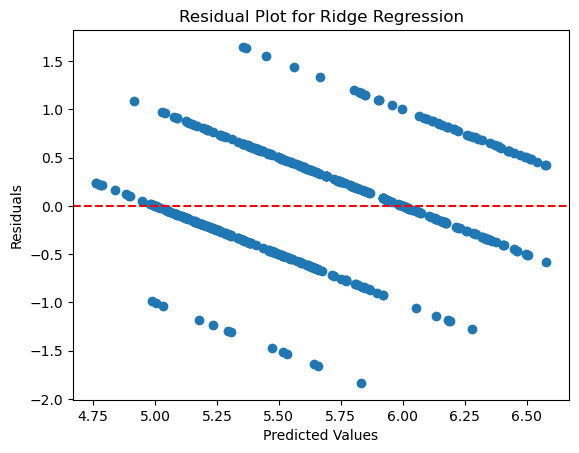

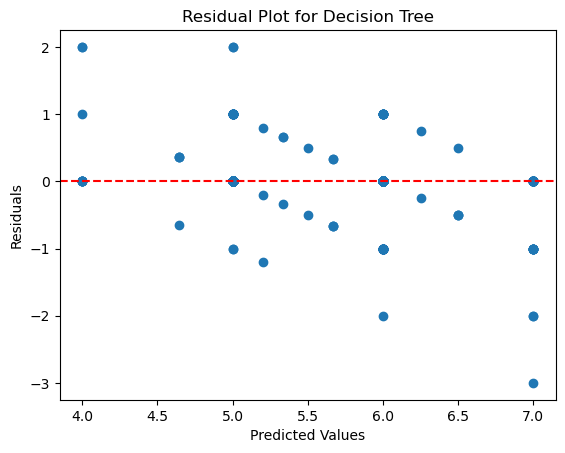

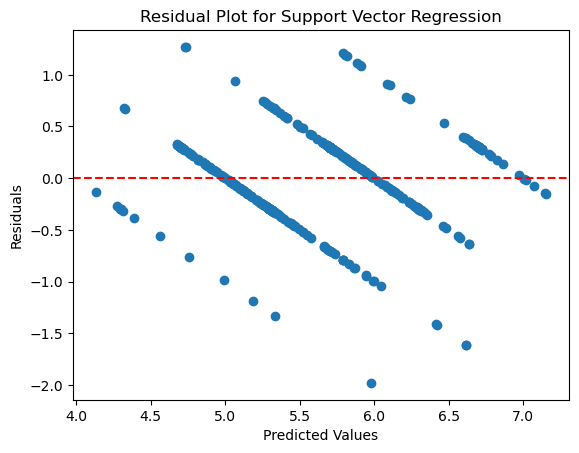

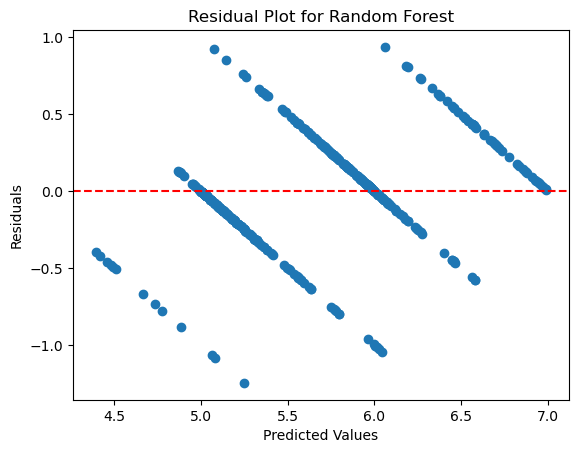

                                MSE      RMSE       R^2
Ridge Regression           0.326399  0.571314  0.367616
Decision Tree              0.232196  0.481867  0.550131
Support Vector Regression  0.179620  0.423816  0.651995
Random Forest              0.111648  0.334137  0.783688


In [27]:
# Define the plot_residuals function 
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {model_name}')
    plt.show()

# Define tuned models
tuned_models = {
    'Ridge Regression': best_ridge,
    'Decision Tree': best_dt,
    'Support Vector Regression': best_svr,
    'Random Forest': best_rf
}

final_results = {}

# Train and evaluate each tuned model
for name, model in tuned_models.items():
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_combined_df, y_combined, test_size=0.2, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store final results
    final_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'R^2': r2
    }
    
    # Plot residuals for each model
    plot_residuals(y_test, y_pred, name)

final_results_df = pd.DataFrame(final_results).T
final_results_df

# Print final results
print(final_results_df) 

### Results Visualisation

The bar chart below visualises the performance of each model based on their MSE, RMSE, and R² scores. This comparison helps in identifying the best performing model for predicting red wine quality for the dataset.

From the plotted data a number of conclusions can be made:
- Random Forest Regression has the lowest MSE (0.111648), meaning it has the smallest average squared difference between predicted and actual values, indicating it makes the most accurate predictions.
- Random Forest Regression has the lowest RMSE (0.334137), therefore showing a lower prediction error compared to the other models.
- Random Forest has the highest R² (0.783688), meaning it explains the most variance in the target variable (78.36%) and therefore fits the data best compared to the other models. This value however could yet still be improved.

Overall, Random Forest is the best performing model across all the performance metrics. Ridge Regression and Linear Regression performed the worst, with higher error rates and lower explained variance, possibly due to overfitting or poor generalisation.

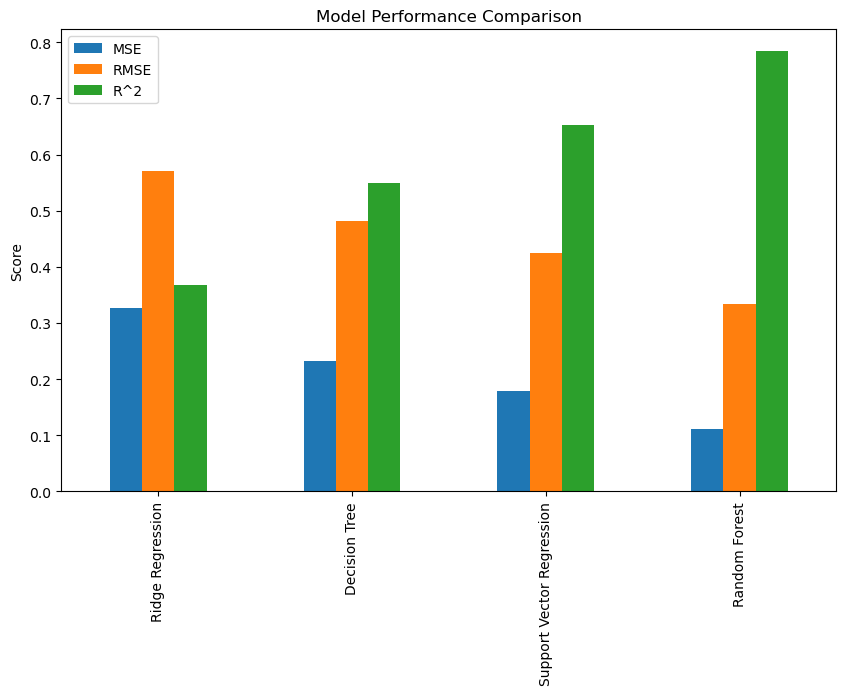

In [29]:
# Plotting results
final_results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()

### Cross-validation

To ensure the robustness cross-validation was performed to all five of the machine learning models to ensure reliable results and to prevent overfitting. MSE error was used as the performance metric as it shows the average squared difference between predicted and actual values.

From the produced data it can be seen that the Random Forest model has the lowest cross-validation MSE, suggesting it performs the best at generalising to unseen data compared to the other models.

In [31]:
# Define the Linear Regression model
lr = LinearRegression()

# Cross-validation for Linear Regression Model
cv_scores_lr = cross_val_score(lr, X_combined_df, y_combined, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression Cross-Validation MSE:", -cv_scores_lr.mean())

# Cross-validation for Ridge Regression Model
cv_scores_ridge = cross_val_score(best_ridge, X_combined_df, y_combined, cv=5, scoring='neg_mean_squared_error')
print("Ridge Regression Cross-Validation MSE:", -cv_scores_ridge.mean())

# Cross-validation for Decision Tree Regression Model
cv_scores_dt = cross_val_score(best_dt, X_combined_df, y_combined, cv=5, scoring='neg_mean_squared_error')
print("Decision Tree Regression Cross-Validation MSE:", -cv_scores_dt.mean())

# Cross-validation for Support Vector Regression Model
cv_scores_svr = cross_val_score(best_svr, X_combined_df, y_combined, cv=5, scoring='neg_mean_squared_error')
print("Support Vector Regression Cross-Validation MSE:", -cv_scores_svr.mean())

# Cross-validation for Random Forest Regression Model
cv_scores_rf = cross_val_score(best_rf, X_combined_df, y_combined, cv=5, scoring='neg_mean_squared_error')
print("Random Forest Regression Cross-Validation MSE:", -cv_scores_rf.mean())

Linear Regression Cross-Validation MSE: 0.3263575341957897
Ridge Regression Cross-Validation MSE: 0.3263609698959682
Decision Tree Regression Cross-Validation MSE: 0.1175200297944466
Support Vector Regression Cross-Validation MSE: 0.12167319604808784
Random Forest Regression Cross-Validation MSE: 0.06743429035949478


## Conclusions

Overall, based on the results from running the code the following conclusions can be made:

- Random Forest Regression achieved the lowest MSE, lowest RMSE and highest R-squared value, indicating its greater predictive performance in comparison to the other models. This results suggest that Random Forest's ability to model complex, non-linear relationships in the data significantly contributed to its success.
- Hyperparameter tuning improved the performance of the SVR model. However, it seemed to have little or negative effect on the Ridge Regression, Decision Tree, and Random Forest models. Generally, adjusting the hyperparameters allows for a better balance of underfitting and overfitting, therefore creating more accurate model.
- Random Forest Regression had the best cross-validation MSE value, suggesting that the model generalises well to unseen data.

### Strengths and Weaknesses Of Each Model

- **Linear Regression:** Simple and interpretable, but struggled to capture complex relationships in the data, leading to lower predictive accuracy compared to other models.
- **Ridge Regression:** Performed well at preventing overfitting and dealing with feature correlation, but it hit a limit when trying to handle more complex patterns, even after tuning the alpha parameter.
- **Decision Tree:** Capable of capturing non-linear relationships, but prone to overfitting without careful hyperparameter tuning, as demonstrated by its higher MSE value.
- **SVR:** Effective for high-dimensional data and provides flexible modelling, but its sensitivity to parameter settings, particularly C and epsilon, required extensive tuning, which increased computational complexity.
- **Random Forest:** Robust in handling non-linearity and variance in the dataset, showing the best performance overall. However, it required more computational resources due to the large number of trees and cross-validation.

### Project Reflections

A large number of challenges were faced during the project, these include:
- **Handling Bias-Variance:** Balancing the bias-variance trade-off was particularly challenging, especially for models like Decision Trees and SVR. Decision Trees tended to overfit the training data, leading to poor generalisation on unseen data. In contrast, SVR required precise tuning to avoid underfitting. Finding the right balance between underfitting and overfitting required trial and error, especially when adjusting hyperparameters like max_depth and min_samples_split for Decision Trees.
- **Hyperparameter Selection:** Selecting appropriate hyperparameters to prevent overfitting was challenging, especially for models like Decision Trees and Random Forest, which have a large number of hyperparameters to tune. GridSearchCV helped address this issue but at the cost of increased computation time. The project taught me the importance of tuning the correct hyperparameters in order to optimise a models performance efficiently.
- **Computational Complexity:** Models such as; Random Forest and SVR were computationally complex, due to the large number of hyperparameter combinations evaluated. Due to having a time limit on the project the best selection of hyperparameters for each model cannot be guaranteed. Balancing computational complexity with the need for model optimisation was essential to ensure the project was completed to a high standard within the given timeframe.

Overall, this project taught me the value of hyperparameter tuning, the importance of balancing model complexity, and how preprocessing steps like feature scaling can effect model performance. Whilst more than three models were evaluated in this project, the time and computational challenges highlighted the need for prioritisation and efficient model selection in the future. Random Forest and Ridge Regression provided the most valuable insights and should be prioritised for this particular dataset. Both models showed strong generalisation ability and effectively handled the variance in the data, making further models less critical for understanding model performance. Although Random Forest required more computational resources and time, the payoff in terms of model performance justified its use. In comparison, Linear Regression, whilst easy to interpret, struggled due to the complexity of the non-linear relationships in the data, making it less suitable for this task.

## References
Cortez, P., Cerdeira, A., Almeida, F., Matos, T. and Reis, J., (2009). Modelling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), pp.547-553. Available at: https://archive.ics.uci.edu/ml/datasets/Wine+Quality (Accessed: 11 September 2024).